In [2]:

import random

# Donnée initiale
X = [1, 2, 3, 4]
Y = [3, 4, 2, 5]

# Génération de la population initiale
def generate_population(pop_size, gene_size):
    population = []
    for i in range(pop_size):
        individual = []
        for j in range(gene_size):
            individual.append(random.uniform(-10, 10))
        population.append(individual)
    return population

# Définition de la condition physique
def fitness(individual):
    fitness = 0
    for i in range(len(X)):
        fitness += (individual[0] * X[i] + individual[1] - Y[i]) ** 2
    return fitness

# Opérateur de croisement (croisement à point unique)
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Opérateur de mutation (distribution gaussienne)
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += random.gauss(0, 1)
    return individual

# Détermination du meilleur individu de la population
def find_best(population):
    best_individual = population[0]
    best_fitness = fitness(best_individual)
    for individual in population:
        ind_fitness = fitness(individual)
        if ind_fitness < best_fitness:
            best_fitness = ind_fitness
            best_individual = individual
    return best_individual, best_fitness

# Algorithme génétique
def genetic_algorithm(pop_size, gene_size, num_generations, crossover_rate, mutation_rate):
    population = generate_population(pop_size, gene_size)
    for i in range(num_generations):
        new_population = []
        while len(new_population) < pop_size:
            parent1 = random.choice(population)
            if random.random() < crossover_rate:
                parent2 = random.choice(population)
                child1, child2 = crossover(parent1, parent2)
                new_population.append(mutate(child1, mutation_rate))
                new_population.append(mutate(child2, mutation_rate))
            else:
                new_population.append(mutate(parent1, mutation_rate))
        population = new_population
        best_individual, best_fitness = find_best(population)
        print(f"Generation {i+1}: Best Fitness = {best_fitness}, Best Individual = {best_individual}")
    return best_individual, best_fitness

# Algorithme génétique
best_individual, best_fitness = genetic_algorithm(pop_size=50, gene_size=2, num_generations=100, crossover_rate=0.8, mutation_rate=0.1)
print(f"Best Fitness = {best_fitness}, Best Individual = {best_individual}")



Generation 1: Best Fitness = 30.24496308449531, Best Individual = [-1.733142097024097, 8.740253591414469]
Generation 2: Best Fitness = 30.73069224509384, Best Individual = [2.7027551221773614, -3.1911487730435635]
Generation 3: Best Fitness = 17.296246109343134, Best Individual = [-1.1887997845538185, 6.816536227329718]
Generation 4: Best Fitness = 34.1802563239583, Best Individual = [2.7027551221773614, -2.3259137778266386]
Generation 5: Best Fitness = 30.24496308449531, Best Individual = [-1.733142097024097, 8.740253591414469]
Generation 6: Best Fitness = 30.24496308449531, Best Individual = [-1.733142097024097, 8.740253591414469]
Generation 7: Best Fitness = 30.24496308449531, Best Individual = [-1.733142097024097, 8.740253591414469]
Generation 8: Best Fitness = 31.083093393358382, Best Individual = [-1.733142097024097, 6.816536227329718]
Generation 9: Best Fitness = 27.305157579413972, Best Individual = [-1.733142097024097, 7.53549958474785]
Generation 10: Best Fitness = 27.3051575

# Exo 2

Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [148, 162, 161, 142, 128]


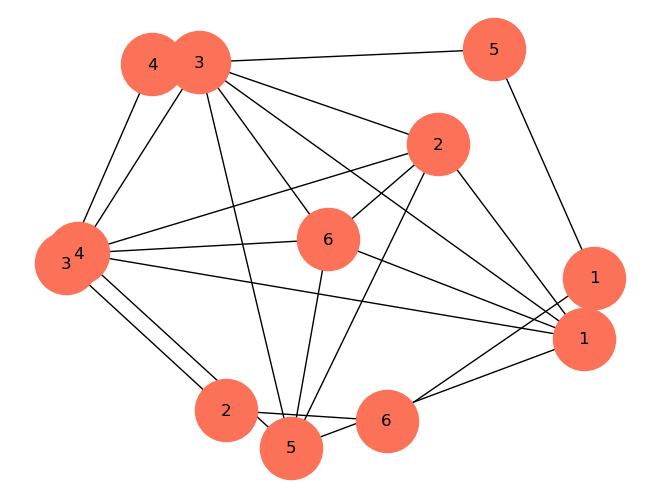

In [36]:
import networkx as nx 
from math import e

distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(4, 5),
    (2, 4),
    (5, 6),
    (6, 2),]
P = [78, 24, 63, 17]

T = 100 

def probqbility(delta, T):
       return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    
    return nextt

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = [edgeLength(V[i], V[i + 1], distances) for i in range(len(V) - 1)]
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeReplacement(V, [Z[i]])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
            else:
                V = V
                sumLength = sumLength
        else:
            V = newV
            sumLength = newS
        T = reduceTemp(T)

    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1]) or (distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]):
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrlength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrlength}')

drawRouteGraph(distances, bestRoute)



# Exo 3

In [4]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Charger les données Boston Housing dataset
boston = load_boston()
X = boston.data
y = boston.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle Ridge avec différents paramètres de régularisation
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    # Créer le modèle Ridge
    model = Ridge(alpha=alpha, normalize=True, solver='auto', max_iter=1000, random_state=42)

    # Ajuster le modèle aux données d'entraînement
    model.fit(X_train, y_train)

    # Prédire les valeurs sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de test
    mse = mean_squared_error(y_test, y_pred)
    print(f"alpha={alpha:.1f}, MSE={mse:.2f}")


C:\Users\HP PROBOOK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

alpha=0.0, MSE=24.29
alpha=0.1, MSE=24.88
alpha=1.0, MSE=28.37
alpha=10.0, MSE=50.82
alpha=100.0, MSE=70.91


C:\Users\HP PROBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\HP PROBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [148, 162, 161, 142, 128]


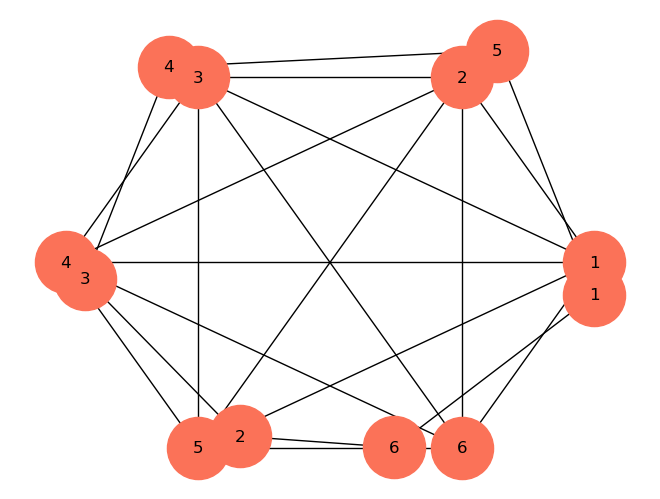

In [38]:
import networkx as nx 
from math import e

distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(4, 5),
    (2, 4),
    (5, 6),
    (6, 2),]
P = [78, 24, 63, 17]

T = 100 

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reduceTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

pos = nx.circular_layout(graph)  # circular layout

nx.draw(graph, pos, node_color='#fb7258', node_size=2000, with_labels=True)

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = [edgeLength(V[i], V[i + 1], distances) for i in range(len(V) - 1)]
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeReplacement(V, [Z[i]])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
            else:
                V = V
                sumLength = sumLength
        else:
            V = newV
            sumLength = newS
        T = reduceTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1]) or (distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]):
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrlength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrlength}')

drawRouteGraph(distances, bestRoute)

Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [148, 162, 161, 142, 128]


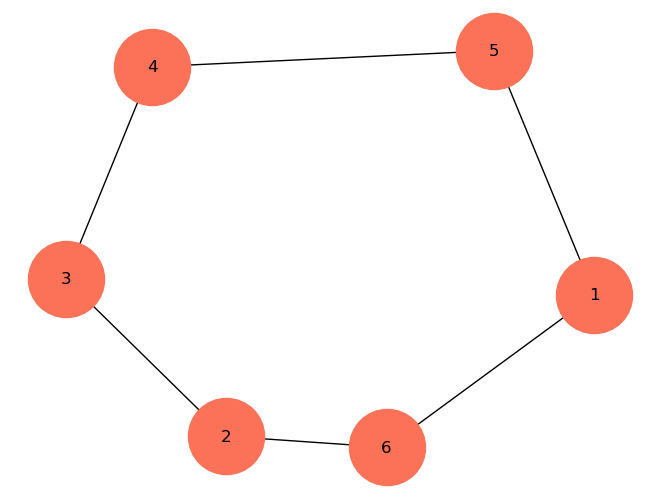

In [40]:
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = [edgeLength(V[i], V[i + 1], distances) for i in range(len(V) - 1)]
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeReplacement(V, [Z[i]])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
            else:
                V = V
                sumLength = sumLength
        else:
            V = newV
            sumLength = newS
        T = reduceTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1]) or (distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]):
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=3000, with_labels=True)

bestRoute, arrlength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrlength}')

drawRouteGraph(distances, bestRoute)